# Regression Project - Train Dataset

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
from datetime import datetime
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [2]:
train = pd.read_csv("train.csv")

In [3]:
print("Number of Observations in housing dataset:", train.shape)
train.head(2)

Number of Observations in housing dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
print('train df has {} rows and {} features'.format(train.shape[0],train.shape[1]))

train df has 1460 rows and 81 features


In [6]:
pd.isnull(train).any()

#checking for nulls

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
#Separate categorical and numerical columns
cat_column = train.dtypes[train.dtypes == 'object']
num_column = train.dtypes[train.dtypes != 'object']

In [11]:
cat_column

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [12]:
num_column

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [13]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [14]:
# Missing Value Handling

def HandleMissingValues(df):
    # for Object columns fill using 'Unknown'
    # for Numeric columns fill using 'median'
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'Unknown'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
    
    
HandleMissingValues(train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


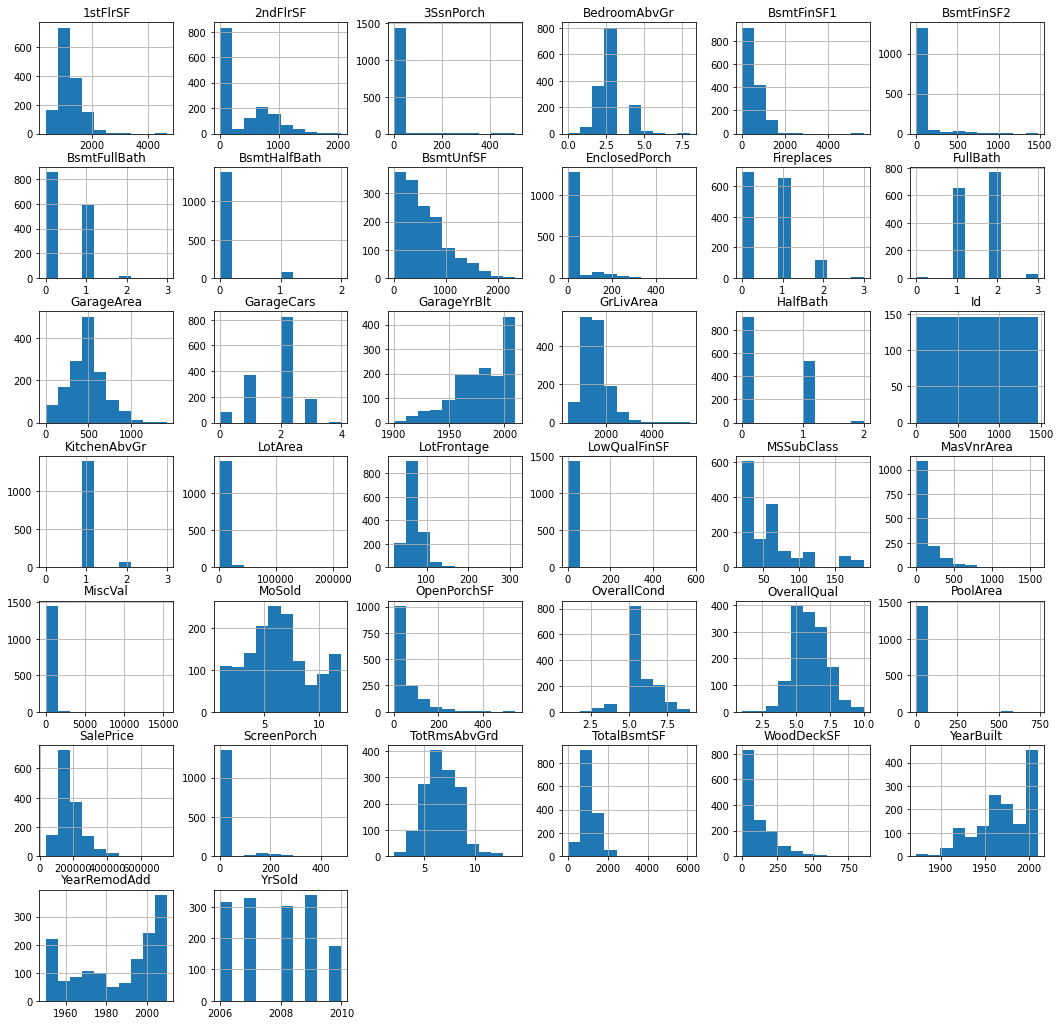

In [15]:
train[list(num_column.index)].hist(figsize = (18,18));

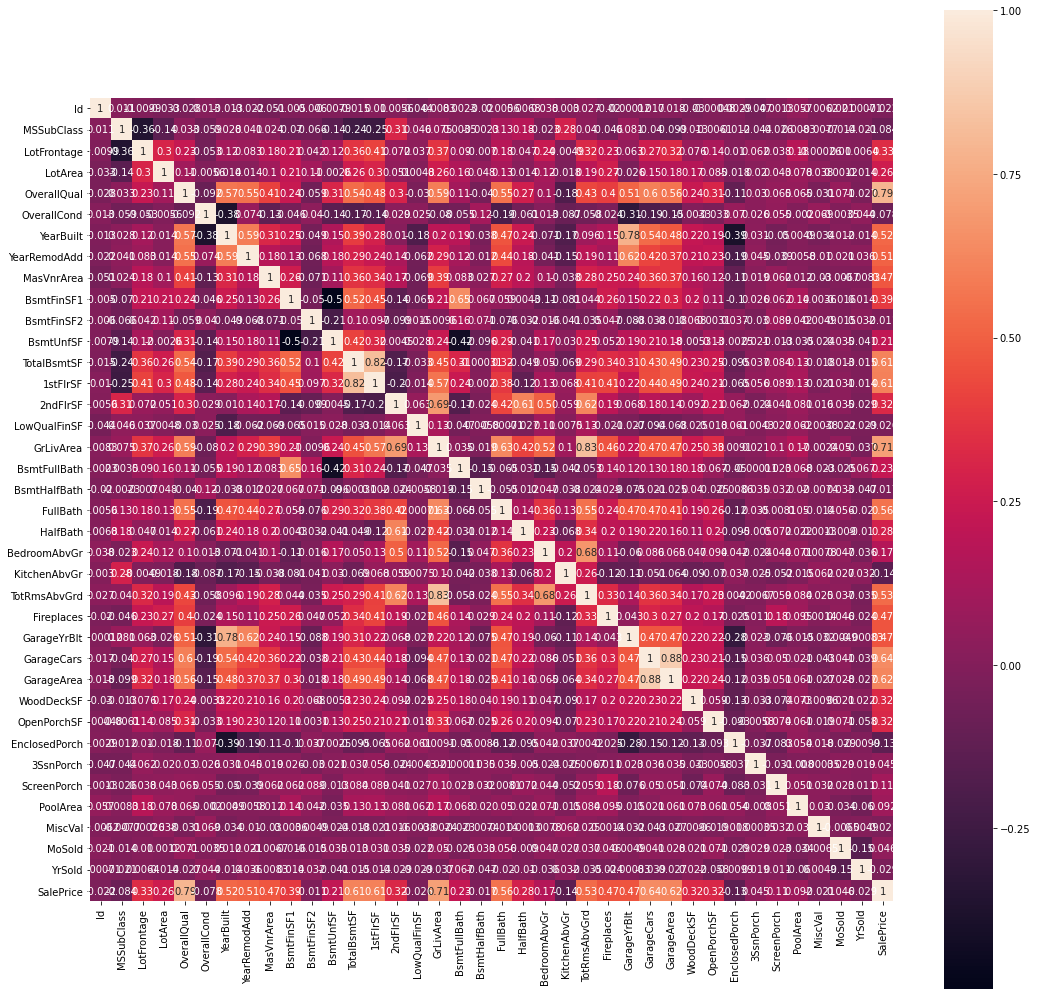

In [16]:
fig = plt.figure(figsize = (18,18))

sns.heatmap(train[list(num_column.index)].corr(),annot = True,square = True);

In [17]:
from sklearn.preprocessing import LabelEncoder
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) )
        train[col] = le.transform(list(train[col].astype(str).values))

In [18]:
y = train['SalePrice']
train.drop(labels = ['SalePrice'],axis = 1,inplace = True)
X = train

In [19]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4


In [20]:
#I have used Robust scaler because it is not sensitve to outliers
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X = scaler.fit_transform(X)

In [21]:
report_reg2 = pd.DataFrame(index = '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17'.split(), columns='ModelName TrainScore TestScore MeanSquaredError RSquareScore'.split())

In [22]:
report_reg2

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


# Linear Regression

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.feature_selection import RFE

In [24]:
#Without Hyper Parameters Tuning
#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1 )
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
# Cross-Validation
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Cross-validation scores: [ 0.68764156 -8.21927996  0.8277867 ]
training score: 0.8430060216261815
test score:  0.8327191886203538
r_square: 0.7770766482659935


In [25]:
report_reg2['ModelName']['0'] = 'Linear Regression'
report_reg2['TrainScore']['0'] = model.score(X_train, y_train)
report_reg2['TestScore']['0'] = model.score(X_test, y_test)
report_reg2['MeanSquaredError']['0'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['0'] = metrics.r2_score(y_test,prediction)

# # KNN Regressor

In [26]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=8)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
from sklearn.metrics import r2_score
print("r_square:",r2_score(prediction,y_test))

training score: 0.7051599282328442
test score:  0.5837130917929036
Cross-validation scores: [0.56449823 0.50210706 0.47158314]
r_square: 0.09513175845486121


In [27]:
report_reg2['ModelName']['1'] = 'KNN regressor'
report_reg2['TrainScore']['1'] = model.score(X_train, y_train)
report_reg2['TestScore']['1'] = model.score(X_test, y_test)
report_reg2['MeanSquaredError']['1'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['1'] = metrics.r2_score(y_test,prediction)

In [28]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X,y)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   10.6s finished


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 14, 'weights': 'uniform'}
training score: 0.6197045947355924
test score:  0.6037711517468101
r_square: -0.03420431395061607


In [29]:
from sklearn.neighbors import KNeighborsRegressor

train_score = []
test_score = []

# Training model

for k in range(1,15):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Accuracy (score)')

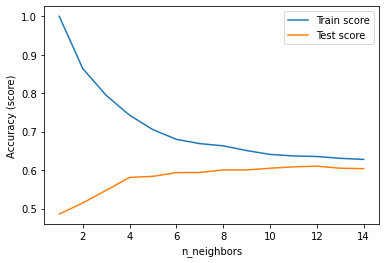

In [30]:
# Plot accuracy scores


x_axis = range(1,15)
plt.plot(x_axis, train_score, label = 'Train score')
plt.plot(x_axis, test_score, label = 'Test score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy (score)')

In [31]:
print('Train_score:', knn.score(X_train, y_train))
print('Test_score:', knn.score(X_test, y_test))

Train_score: 0.6278440748391847
Test_score: 0.6037711517468101


### KNN Regressor(K = 14): Train Score = 0.6278 Test Score = 0.6037 


In [32]:
report_reg2['ModelName']['2'] = 'KNN with gridcv'
report_reg2['TrainScore']['2'] = model1.score(X_train, y_train)
report_reg2['TestScore']['2'] = model1.score(X_test, y_test)
report_reg2['MeanSquaredError']['2'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['2'] = metrics.r2_score(y_test,prediction)

# Ridge

linear regression train score: 0.8430060216261815
linear regression test score: 0.8327191886203538
ridge regression train score low alpha: 0.8430059364643445
ridge regression test score low alpha: 0.8327382809503818
ridge regression train score high alpha: 0.8363651552924777
ridge regression test score high alpha: 0.8380767815679881
Cross-validation scores: [0.7312457  0.77313418 0.84776838]


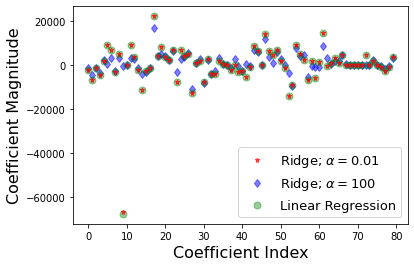

In [33]:
#Without Hyper Parameters Tuning
#Ridge
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rr100, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [34]:
report_reg2['ModelName']['3'] = 'Ridge'
report_reg2['TrainScore']['3'] = rr100.score(X_train, y_train)
report_reg2['TestScore']['3'] = rr100.score(X_test, y_test)
report_reg2['MeanSquaredError']['3'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['3'] = metrics.r2_score(y_test,prediction)

In [35]:
#With Hyper Parameters Tuning and grid search
#Ridge
ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, verbose=2)
model1.fit(X, y)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] alpha=200 .......................................................
[CV] ........................................ alpha=200, total=   0.0s
[CV] alpha=200 .......................................................
[CV] ........................................ alpha=200, total=   0.0s
[CV] alpha=200 .......................................................
[CV] ........................................ alpha=200, total=   0.0s
[CV] alpha=200 .......................................................
[CV] ........................................ alpha=200, total=   0.0s
[CV] alpha=200 .......................................................
[CV] ........................................ alpha=200, total=   0.0s
[CV] alpha=230 .......................................................
[CV] ........................................ alpha=230, total=   0.0s
[CV] alpha=230 .......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [36]:
report_reg2['ModelName']['4'] = 'Ridge with gridcv'
report_reg2['TrainScore']['4'] = model1.score(X_train, y_train)
report_reg2['TestScore']['4'] = model1.score(X_test, y_test)
report_reg2['MeanSquaredError']['4'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['4'] = metrics.r2_score(y_test,prediction)

# Polynomial Regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}
model1 = GridSearchCV(PolynomialRegression(), param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)

model1.fit(X_train, y_train)
best_parameters = model1.best_params_
print(best_parameters)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.4s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polyno

[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.3s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=False, linearregression__norma

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.5s finished


{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
training score: -1.0689253282582394e-19
test score:  -4860278611.796204
r_square: 0.37655901669347835


In [38]:
report_reg2['ModelName']['5'] = 'Poly'
report_reg2['TrainScore']['5'] = model1.score(X_train, y_train)
report_reg2['TestScore']['5'] = model1.score(X_test, y_test)
report_reg2['MeanSquaredError']['5'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['5'] = metrics.r2_score(y_test,prediction)

# Lasso

training score: 0.8430056033168539
test score:  0.8329278069423606
number of features used:  79
training score for alpha=0.01: 0.8430060215843505
test score for alpha =0.01:  0.8327212796368633
number of features used: for alpha =0.01: 79
training score for alpha=0.0001: 0.8430060216261771
test score for alpha =0.0001:  0.832719209661988
number of features used: for alpha =0.0001: 80
Cross-validation scores: [ 0.6876446  -8.21777757  0.82778767]


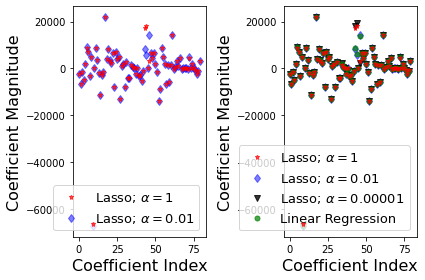

In [39]:
#Without Hyper Parameters Tuning
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso001, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [40]:
report_reg2['ModelName']['6'] = 'Lasso'
report_reg2['TrainScore']['6'] = lasso001.score(X_train, y_train)
report_reg2['TestScore']['6'] = lasso001.score(X_test,y_test)
report_reg2['MeanSquaredError']['6'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['6'] = metrics.r2_score(y_test,prediction)

In [41]:
#With Hyper Parameters Tuning and grid search
#Lasso
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   43.6s finished


Best Hyper Parameters:
 {'alpha': 0.14907119849998599}
training score: 0.8322576822537657
test score:  0.8991335884900289
r2: 0.8991335884900289


In [42]:
report_reg2['ModelName']['7'] = 'Lasso with CV'
report_reg2['TrainScore']['7'] = clf.score(X_train, y_train)
report_reg2['TestScore']['7'] = clf.score(X_test, y_test)
report_reg2['MeanSquaredError']['7'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['7'] = metrics.r2_score(y_test,prediction)

# SVR 

In [43]:
#Without Hyper Parameters Tuning
#SVR
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=1.0, epsilon=0.2)
model1.fit(X_train,y_train)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.06864963346539599
test score:  0.10504097937219957
Cross-validation scores: [ 0.02846233 -0.07241427  0.03534895]
r2: 0.10504097937219958


In [44]:
report_reg2['ModelName']['8'] = 'SVR'
report_reg2['TrainScore']['8'] = model1.score(X_train, y_train)
report_reg2['TestScore']['8'] = model1.score(X_test, y_test)
report_reg2['MeanSquaredError']['8'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['8'] = metrics.r2_score(y_test,prediction)

In [45]:
#SVR with grid search 

from sklearn.model_selection import GridSearchCV
model= SVR()
parameters = {'kernel':['rbf','sigmoid'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=20), 
              'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=30)}
model1 = GridSearchCV(model, parameters, n_jobs=8, verbose=2)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 

from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))



Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 276 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 682 tasks      | elapsed:   13.0s
[Parallel(n_jobs=8)]: Done 1248 tasks      | elapsed:   24.1s
[Parallel(n_jobs=8)]: Done 1978 tasks      | elapsed:   48.0s
[Parallel(n_jobs=8)]: Done 2868 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 3600 out of 3600 | elapsed:  1.3min finished


Best Hyper Parameters:
 {'C': 200.00000000000003, 'gamma': 0.10506813687792228, 'kernel': 'sigmoid'}
training score: 0.4539020709573766
test score:  0.457679058690835
r2: 0.4576790586908349


In [46]:
report_reg2['ModelName']['9'] = 'SVR with CV'
report_reg2['TrainScore']['9'] = model1.score(X_train, y_train)
report_reg2['TestScore']['9'] = model1.score(X_test, y_test)
report_reg2['MeanSquaredError']['9'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['9'] = metrics.r2_score(y_test,prediction)

In [47]:
print("Best accuracy: ",max)

Best accuracy:  <built-in function max>


In [48]:
report_reg2

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,Linear Regression,0.843006,0.832719,1.19444e+09,0.832719
1,KNN regressor,0.70516,0.583713,2.97241e+09,0.583713
2,KNN with gridcv,0.627844,0.603771,2.82919e+09,0.603771
3,Ridge,0.836365,0.838077,2.82919e+09,0.603771
4,Ridge with gridcv,0.826694,0.87513,8.91612e+08,0.87513
5,Poly,-1.06893e-19,-4.86028e+09,4.86028e+09,0.319318
6,Lasso,0.843006,0.832721,4.86028e+09,0.319318
7,Lasso with CV,0.832258,0.899134,7.20217e+08,0.899134
8,SVR,0.0686496,0.105041,6.39028e+09,0.105041
9,SVR with CV,0.453902,0.457679,3.87234e+09,0.457679


In [49]:
###

#Checking all the models based on its R2 value, test score. We can conclude that Lasso with Gridsearch and Cross validation
#is the best regressor for this dataset.

###

In [50]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=10),n_estimators = 100, max_samples = 20,bootstrap=True,
                          random_state=2, verbose=1,oob_score=True,)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
from  sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6158056267787528


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [51]:
report_reg2['ModelName']['10'] = 'Bagging with Randomforestregressor'
report_reg2['TrainScore']['10'] = model2.score(X_train, y_train)
report_reg2['TestScore']['10'] = model2.score(X_test, y_test)
report_reg2['MeanSquaredError']['10'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['10'] = metrics.r2_score(y_test,prediction)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [52]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
model2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), 
                          n_estimators=5,bootstrap=True, oob_score=True, random_state=2, verbose=1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
from  sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.8169681228923732


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [53]:
report_reg2['ModelName']['11'] = 'Bagging with DecisionTreeregressor'
report_reg2['TrainScore']['11'] = model2.score(X_train, y_train)
report_reg2['TestScore']['11'] = model2.score(X_test, y_test)
report_reg2['MeanSquaredError']['11'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['11'] = metrics.r2_score(y_test,prediction)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=10),n_estimators = 100, max_samples = 20,
                          bootstrap=False,
                          random_state=2, verbose=1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
from  sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6047559155089268


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [55]:
report_reg2['ModelName']['12'] = 'Pasting with Randomforestregressor'
report_reg2['TrainScore']['12'] = model2.score(X_train, y_train)
report_reg2['TestScore']['12'] = model2.score(X_test, y_test)
report_reg2['MeanSquaredError']['12'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['12'] = metrics.r2_score(y_test,prediction)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [56]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
model2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), 
                          n_estimators=5,bootstrap=False, random_state=2, verbose=1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
from  sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.8281958767197086


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [57]:
report_reg2['ModelName']['13'] = 'Pasting with DecisionTreeregressor'
report_reg2['TrainScore']['13'] = model2.score(X_train, y_train)
report_reg2['TestScore']['13'] = model2.score(X_test, y_test)
report_reg2['MeanSquaredError']['13'] = metrics.mean_squared_error(y_test,prediction)
report_reg2['RSquareScore']['13'] = metrics.r2_score(y_test,prediction)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [58]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),
                            n_estimators=50, learning_rate=0.2,loss='exponential', random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
from  sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.48316294851971675


In [59]:
report_reg2['ModelName']['14'] = 'AdaboostforDecisionTreeRegressor'
report_reg2['TrainScore']['14'] = ada_clf.score(X_train, y_train)
report_reg2['TestScore']['14'] = ada_clf.score(X_test, y_test)
report_reg2['MeanSquaredError']['14'] = metrics.mean_squared_error(y_test,y_pred)
report_reg2['RSquareScore']['14'] = metrics.r2_score(y_test,y_pred)

## Ada Boosting for KNN Regressor

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsRegressor()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)


0.5840369393548681

In [61]:
report_reg2['ModelName']['15'] = 'AdaboostforKNNRegressor'
report_reg2['TrainScore']['15'] = ada_clf.score(X_train, y_train)
report_reg2['TestScore']['15'] = ada_clf.score(X_test, y_test)

## Ada Boosting for Ridge Regressor

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from  sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.001, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.5815591048025903

In [63]:
report_reg2['ModelName']['16'] = 'AdaboostforRidgeRegressor'
report_reg2['TrainScore']['16'] = ada_clf.score(X_train, y_train)
report_reg2['TestScore']['16'] = ada_clf.score(X_test, y_test)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gd_clf=GradientBoostingRegressor(n_estimators=400, max_depth=5, 
                              loss='ls',min_samples_split=2,learning_rate=0.1)
gd_clf.fit(X_train, y_train)
y_pred = gd_clf.predict(X_test)
from  sklearn import metrics
print(metrics.r2_score(y_test, y_pred))

0.8638652411107831


In [65]:
report_reg2['ModelName']['17'] = 'Gradientboost'
report_reg2['TrainScore']['17'] = gd_clf.score(X_train, y_train)
report_reg2['TestScore']['17'] = gd_clf.score(X_test, y_test)
report_reg2['MeanSquaredError']['17'] = metrics.mean_squared_error(y_test,y_pred)
report_reg2['RSquareScore']['17'] = metrics.r2_score(y_test,y_pred)

## DeepLearning Techniques

In [66]:
dropout = 0.1
epochs = 10
batch_size = 10
optimizer = 'adam'
k = 5

In [67]:
from keras.wrappers.scikit_learn import  KerasRegressor
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    regressor.add(Dropout(dropout))
    regressor.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics=['mse', 'mae', 'mape', 'cosine'])
    return regressor
build_regressor().summary()
regressor = KerasRegressor(build_fn = build_regressor, batch_size = batch_size, epochs = epochs, verbose=1)
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5)
max = accuracies.max()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1296      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
876/876 [==============================] - 0s 410us/step - loss: 39598795476.7489 - mse: 39598800896.0000 - mae: 182333.9062 - mape: 99.9996 - cosine: 1.0000
Epoch 2/10
876/876 [==============================] - 0s 89us/step - loss: 39598707333.2603 - mse: 39598706688.0000 - mae: 182333.6875 - mape: 99.9995 - cosine: 1.0000
Epoch 3/10
876/876 [=========================

In [68]:
report_reg2

,ModelName,TrainScore,TestScore,MeanSquaredError,RSquareScore
0,Linear Regression,0.843006,0.832719,1.19444e+09,0.832719
1,KNN regressor,0.70516,0.583713,2.97241e+09,0.583713
2,KNN with gridcv,0.627844,0.603771,2.82919e+09,0.603771
3,Ridge,0.836365,0.838077,2.82919e+09,0.603771
4,Ridge with gridcv,0.826694,0.87513,8.91612e+08,0.87513
5,Poly,-1.06893e-19,-4.86028e+09,4.86028e+09,0.319318
6,Lasso,0.843006,0.832721,4.86028e+09,0.319318
7,Lasso with CV,0.832258,0.899134,7.20217e+08,0.899134
8,SVR,0.0686496,0.105041,6.39028e+09,0.105041
9,SVR with CV,0.453902,0.457679,3.87234e+09,0.457679
